<a href="https://colab.research.google.com/github/aakankshch/classification/blob/main/Job_Change_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/train.csv")

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.shape

(19158, 14)

In [ ]:
#Info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

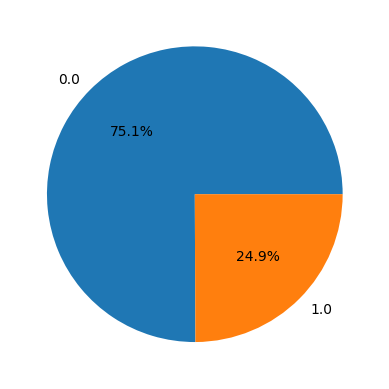

In [ ]:
plt.pie(df['target'].value_counts(),labels=df['target'].value_counts().index,autopct='%0.1f%%')
plt.show()

75% are not willing to change while 24.9% are willing to change.
There is imbalance in data

In [ ]:
df_null=pd.DataFrame({'Count Missing': df.isnull().sum(), 'Percent Missing': df.isnull().mean()*100})

In [ ]:
df_null.sort_values('Percent Missing', ascending=False)

,Count Missing,Percent Missing
company_type,6140,32.049274
company_size,5938,30.994885
gender,4508,23.530640
major_discipline,2813,14.683161
education_level,460,2.401086
last_new_job,423,2.207955
enrolled_university,386,2.014824
experience,65,0.339284
enrollee_id,0,0.000000
city,0,0.000000


In [ ]:
#Columns which have null values
null_values=df_null[df_null['Percent Missing']>0].index

In [ ]:
null_values

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

Data is Missing from Gender, Enrolled University, Education Level,major_discipline, Experience, Company Size, Company type and last new job

<Axes: >

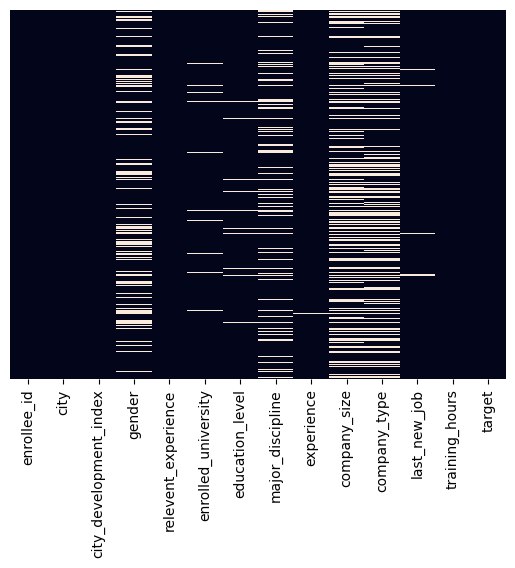

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


<ipython-input-150-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

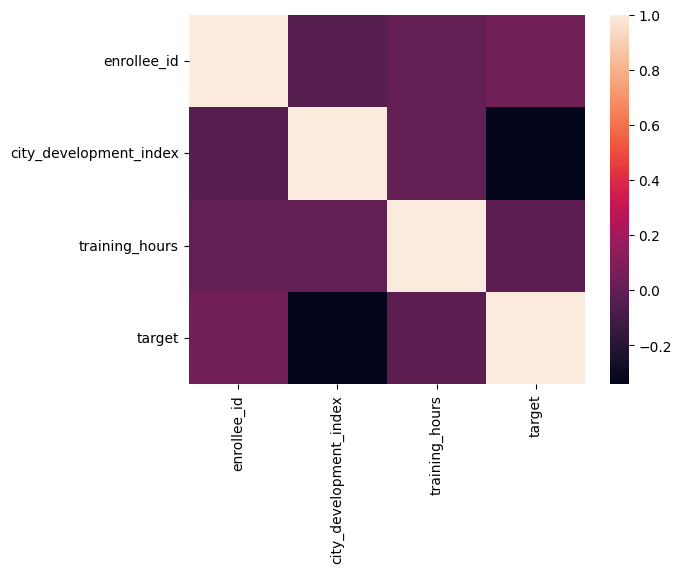

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# df.nunique() #Counts number of distinct elements for a column
df.duplicated().sum() #There are no duplicated rows

0

In [ ]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [ ]:
numerical_cols=[cols for cols in df.columns if df[cols].dtype !='O']
categorical_cols = [cols for cols in df.columns if df[cols].dtype == 'O']

In [ ]:
print(f'We have {len(numerical_cols)} Numerical features : {numerical_cols}')
print(f'We have {len(categorical_cols)} Categorical features : {categorical_cols}')

We have 4 Numerical features : ['enrollee_id', 'city_development_index', 'training_hours', 'target']
We have 10 Categorical features : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


### Visualization

<Axes: xlabel='city_development_index', ylabel='Count'>

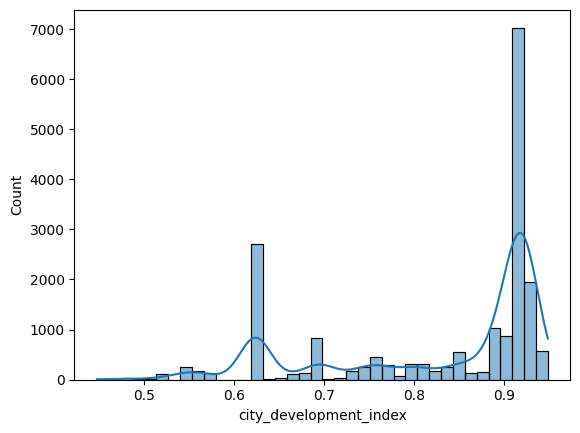

In [ ]:
sns.histplot(x=df['city_development_index'],kde=True)

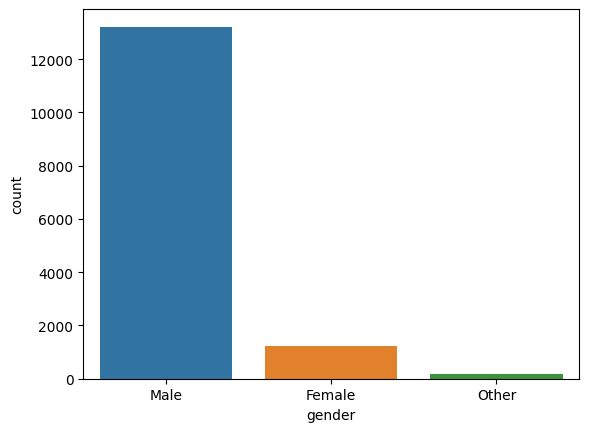

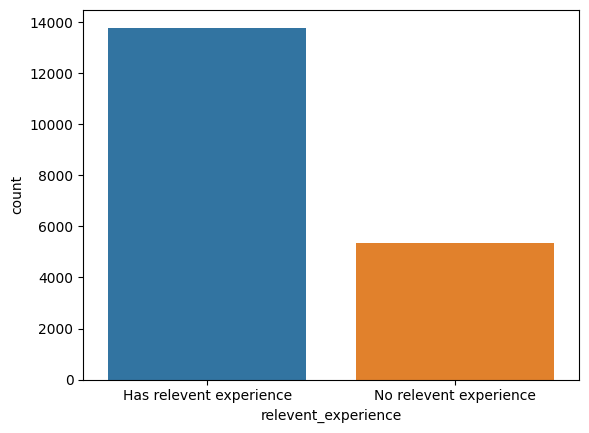

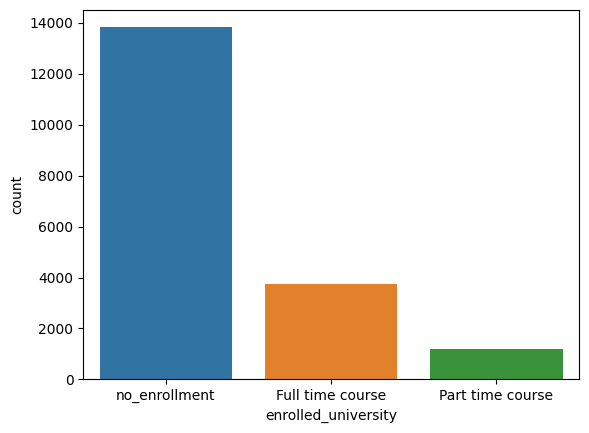

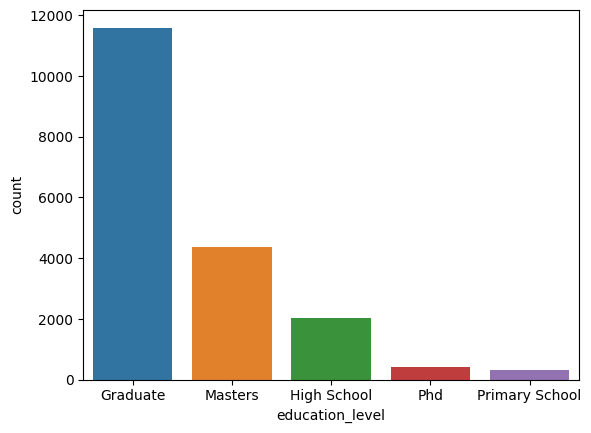

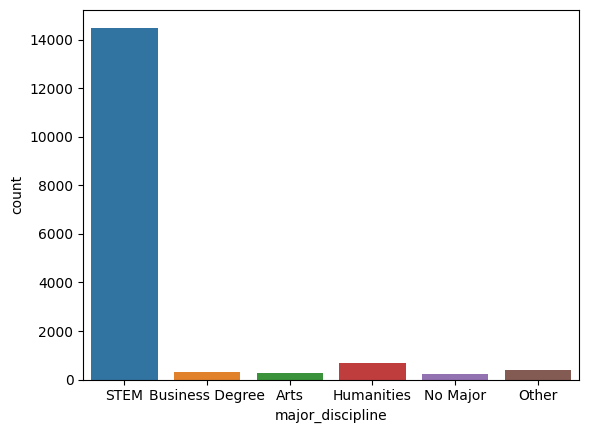

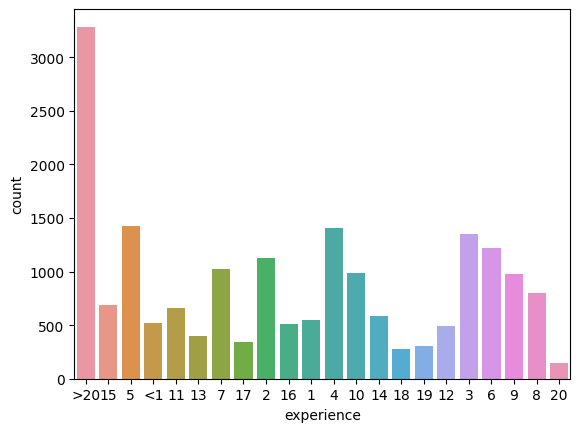

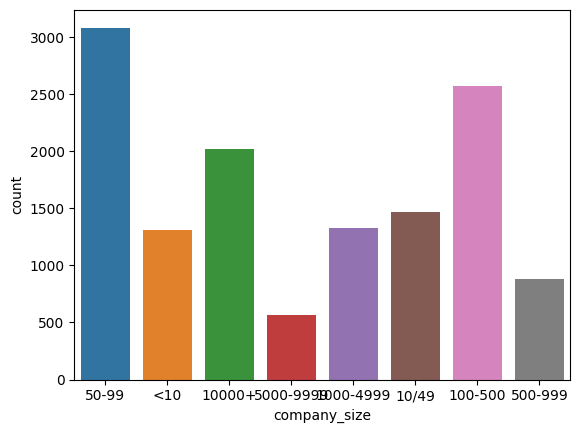

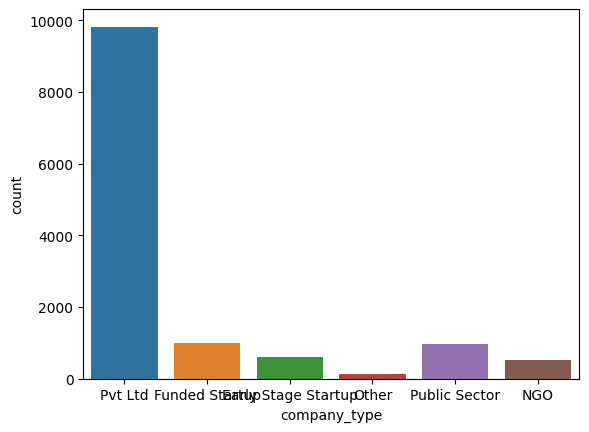

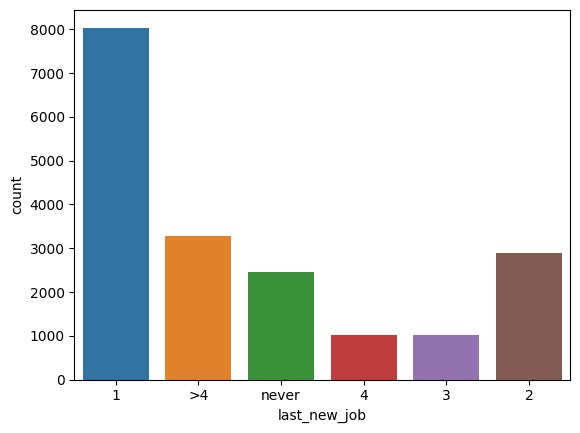

In [ ]:
for cols in categorical_cols:
  if cols!='city':
    sns.countplot(x=df[cols])
    plt.show()

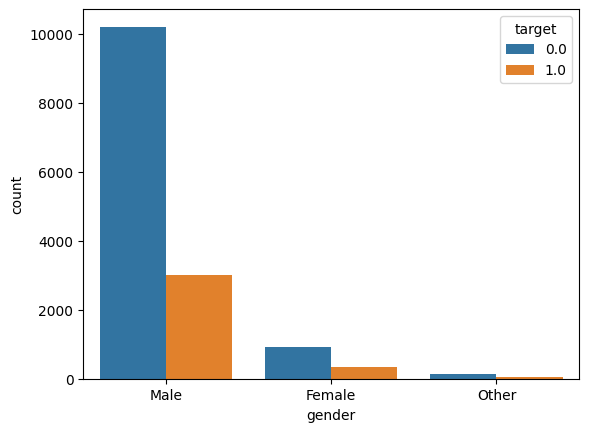

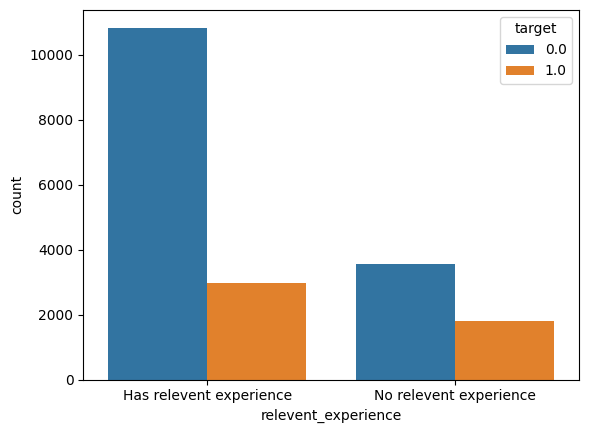

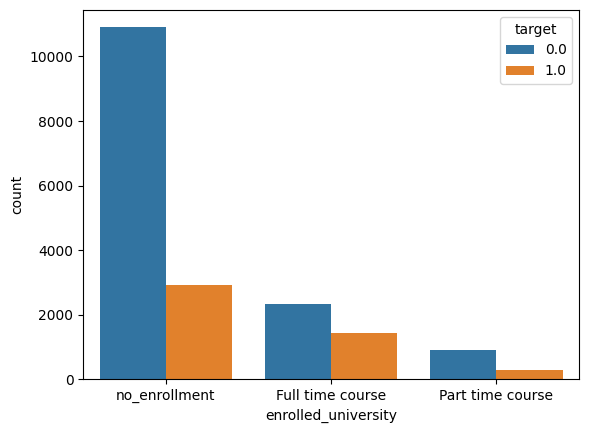

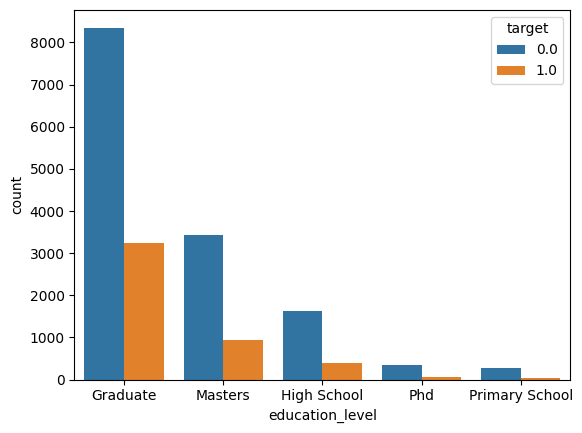

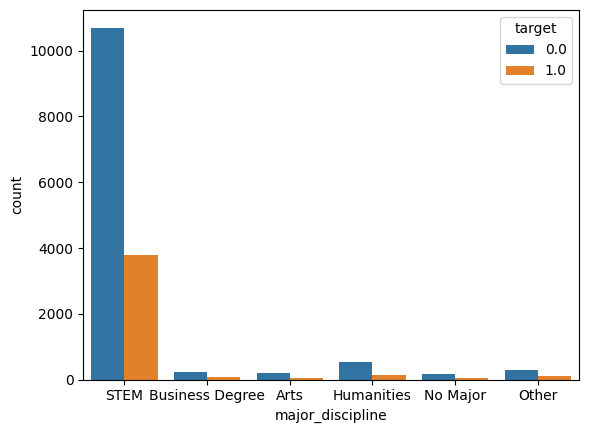

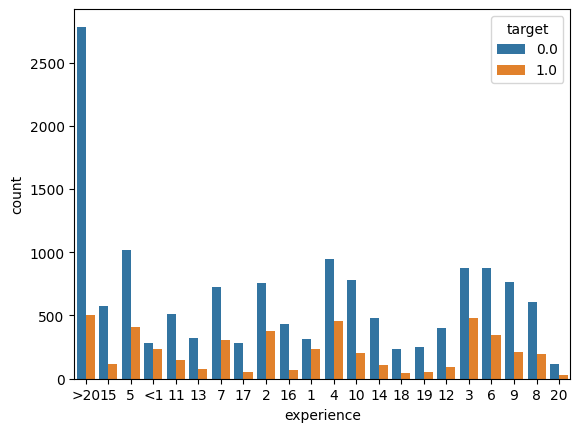

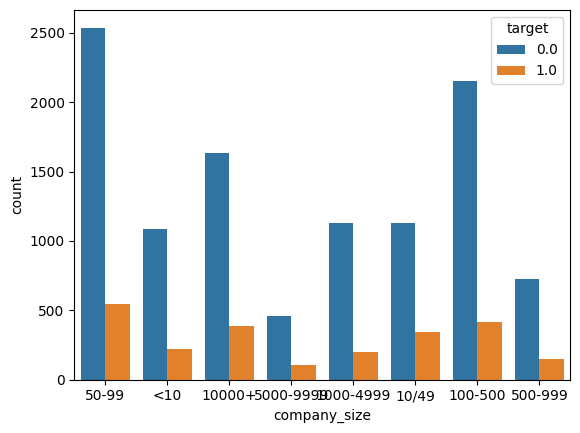

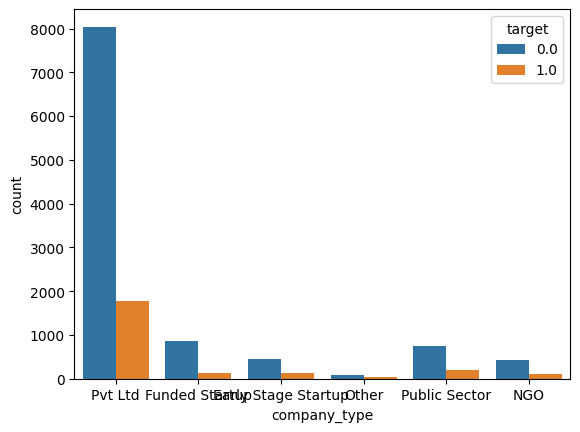

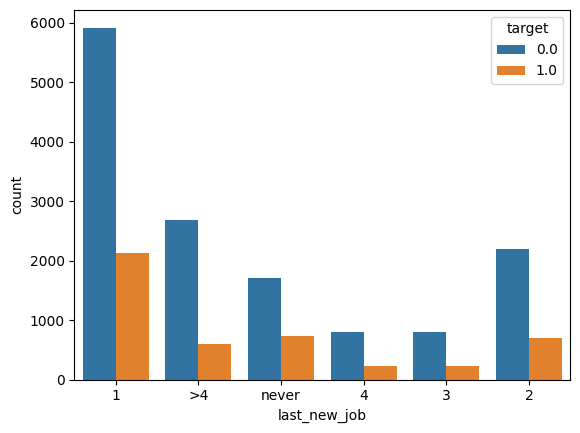

In [ ]:
for cols in categorical_cols:
  if cols!='city':
    sns.countplot(x=df[cols],hue=df['target'])
    plt.show()

## Data Cleaning

In [ ]:
null_values

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

In [ ]:
for i in null_values:
  print(f'{i}:{df[i].nunique()} values')
  print(f'{df[i].unique()}')
  print('-----------')

gender:3 values
['Male' nan 'Female' 'Other']
-----------
enrolled_university:3 values
['no_enrollment' 'Full time course' nan 'Part time course']
-----------
education_level:5 values
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
-----------
major_discipline:6 values
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
-----------
experience:22 values
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
-----------
company_size:8 values
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
-----------
company_type:6 values
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
-----------
last_new_job:6 values
['1' '>4' 'never' '4' '3' '2' nan]
-----------


For Company Size : There is a unique value which is 10/49 and we need to bring it to required format 10-49


In [ ]:
df['company_size'] = df['company_size'].replace('10/49', '10-49')

**Taking a copy of dataframe**

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [ ]:
categorical_cols

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

city column can be removed as city column index data is already present

In [ ]:
try:
  categorical_cols.remove('city')
except:
  pass

Handling Null Values for Categorical Columns

In [ ]:
null_values

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

In [ ]:
#Removing null values
df_copy['company_size'].fillna(value='Missing',inplace=True)
df_copy["company_type"].fillna('Missing', inplace=True)
df_copy['gender'].fillna(value='Missing',inplace=True)
df_copy['major_discipline'].fillna(value='Missing', inplace=True)
df_copy['enrolled_university'].fillna(value=df_copy['enrolled_university'].mode()[0],inplace=True)
df_copy['education_level']=df_copy['education_level'].fillna(value='Missing')
df_copy['experience'].fillna(value=df_copy['experience'].mode()[0], inplace=True)
df_copy['last_new_job'].fillna(value=df_copy['last_new_job'].mode()[0],inplace=True)

In [ ]:
df_copy=df_copy.drop(['enrollee_id','city'],axis=1)

In [ ]:
df_copy.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Null Values has been removed

In [ ]:
df_copy.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,Missing,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5,Missing,Missing,never,83,0.0
3,0.789,Missing,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Missing,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
final_df=pd.get_dummies(df_copy,drop_first=True)

In [ ]:
final_df.head()

,city_development_index,training_hours,target,gender_Male,gender_Missing,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_Missing,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0.776,47,0.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.624,83,0.0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.789,52,1.0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0.767,8,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
final_df.columns

Index(['city_development_index', 'training_hours', 'target', 'gender_Male',
       'gender_Missing', 'gender_Other',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Missing',
       'education_level_Phd', 'education_level_Primary School',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_Missing', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_10',
       'experience_11', 'experience_12', 'experience_13', 'experience_14',
       'experience_15', 'experience_16', 'experience_17', 'experience_18',
       'experience_19', 'experience_2', 'experience_20', 'experience_3',
       'experience_4', 'experience_5', 'experience_6', 'experience_7',
       'experience_8', 'experience_9', 'experience_<1', 'experience_>20',
  

**XGBoost can not have feature names with special characters**

In [ ]:
l2=[]
l=['<','>','+']
for i in final_df.columns:
  for j in l:
    if j in i:
      l2.append(i)

In [ ]:
print(l2)

['experience_<1', 'experience_>20', 'company_size_10000+', 'company_size_<10', 'last_new_job_>4']


In [ ]:
new_column_names = {'experience_<1':'experience_lessthan_1',
                   'experience_>20':'experience_greaterthan_20',
                   'company_size_10000+':'company_size_10000_plus',
                    'company_size_<10':'company_size_lessthan_10',
                    'last_new_job_>4': 'last_new_job_greater_than_4'}
final_df.rename(columns=new_column_names, inplace=True)

In [ ]:
np.shape(final_df)

(19158, 60)

In [ ]:
print(df_copy.shape,final_df.shape)

(19158, 12) (19158, 60)


In [ ]:
final_df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

There is imbalance in dataset

Preprocessing the Categorical Variables

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
X = final_df.drop('target', axis=1)
y = final_df['target']

In [ ]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [ ]:
print(f"The number of classes before fit {Counter(y)}")
print(f"The number of classes after fit {Counter(y_res)}")

The number of classes before fit Counter({0.0: 14381, 1.0: 4777})
The number of classes after fit Counter({0.0: 14211, 1.0: 14211})


Imbalance Dataset has been handled

In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res= train_test_split(X_res, y_res, test_size = 0.2, random_state = 42) #Over Sampling

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 42) #Not Handling Imbalance Dataset

In [ ]:
X.shape,X_res.shape

((19158, 59), (28422, 59))

In [ ]:
X_test.shape,X_test_res.shape

((3832, 59), (5685, 59))

In [ ]:
print(X_train_res.shape,y_train_res.shape)
print(X_train.shape,y_train.shape)

(22737, 59) (22737,)
(15326, 59) (15326,)


## SVM Classifier

In [ ]:
svm_model = SVC()

In [ ]:
# svm_model.fit(X_train_res,y_train_res)
# y_pred_svm_model=svm_model.predict(X_test_res)
# print('Accuracy of model using SVM Classifier:',accuracy_score(y_test_res,y_pred_svm_model)*100)

In [ ]:
#Train and predict SVM classifier for the data without over sampling
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm_model_nos = svm_model.predict(X_test)

In [ ]:
print('Accuracy of model using SVM Classifier:',accuracy_score(y_test,y_pred_svm_model_nos)*100)

Accuracy of model using SVM Classifier: 75.15657620041753


## XGBoost

In [ ]:
# def xgboost(model,X_train,y_train,X_test,y_test):
#   model.fit(X_train,y_train)
#   y_pred=model.predict(X_test)
#   acc=print(f'Accuracy is: {accuracy_score(y_test,y_pred)*100}')

In [ ]:
# xgboost(XGBClassifier(),X_train_res,y_train_res,X_test_res,y_test_res)

In [ ]:
# xgboost.fit(X_train,y_train)

##Model training

In [ ]:
models={'Logistic Regression' :LogisticRegression(),
        'KNN Classifier': KNeighborsClassifier(),
        'Decision Tree Classifier' : DecisionTreeClassifier(),
        'Random Forest Classifier': RandomForestClassifier(),
        'Gradient Boosting Classfifier':GradientBoostingClassifier(),
        'Xgboost' :XGBClassifier(),
        'SVM Classifier':  SVC()
}

In [ ]:
results=[]
for i in range (len (list (models))):
     model = list (models.values ())[i]
     model. fit(X_train, y_train) # Train model
     # Make predictions
     y_pred = model.predict(X_test)
 # Training set performance
     model_test_accuracy = accuracy_score(y_test, y_pred)
     model_test_rocauc_score = roc_auc_score(y_test, y_pred)
     model_test_classification_report=classification_report(y_test,y_pred)
     model_test_confusion_matrix=confusion_matrix(y_test,y_pred)
     results.append(model_test_accuracy*100)

     print(list (models.keys ())[i])
     print('Model performance for Test set')
     print("- Accuracy: {:.4f}".format (model_test_accuracy*100))
     print('- Roc Auc Score: {:4f}'.format (model_test_rocauc_score))
     print(model_test_classification_report)
     print(model_test_confusion_matrix)
     print('-'*35)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Test set
- Accuracy: 77.3486
- Roc Auc Score: 0.603889
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      2880
         1.0       0.60      0.27      0.37       952

    accuracy                           0.77      3832
   macro avg       0.70      0.60      0.62      3832
weighted avg       0.75      0.77      0.74      3832

[[2710  170]
 [ 698  254]]
-----------------------------------
KNN Classifier
Model performance for Test set
- Accuracy: 73.3038
- Roc Auc Score: 0.578386
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83      2880
         1.0       0.44      0.27      0.34       952

    accuracy                           0.73      3832
   macro avg       0.61      0.58      0.58      3832
weighted avg       0.70      0.73      0.71      3832

[[2551  329]
 [ 694  258]]
-----------------------------------
Decision Tree Classifier
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results_sampling=[]
for i in range (len (list (models))):
     model = list (models.values ())[i]
     model.fit(X_train_res, y_train_res) # Train model
     # Make predictions
     y_pred_res = model.predict(X_test_res)
 # Training set performance
     model_test_accuracy = accuracy_score(y_test_res, y_pred_res)
     model_test_rocauc_score = roc_auc_score(y_test_res, y_pred_res)
     model_test_classification_report=classification_report(y_test,y_pred)
     model_test_confusion_matrix=confusion_matrix(y_test,y_pred)
     results_sampling.append(model_test_accuracy*100)

     print(list (models.keys ())[i])
     print('Model performance for Test set')
     print("- Accuracy: {:.4f}".format (model_test_accuracy*100))
     print('- Roc Auc Score: {:4f}'.format (model_test_rocauc_score))
     print(model_test_classification_report)
     print(model_test_confusion_matrix)

     print('-'*35)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Logistic Regression
Model performance for Test set
- Accuracy: 83.0255
- Roc Auc Score: 0.830031
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832

[[2880    0]
 [ 952    0]]
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classifier
Model performance for Test set
- Accuracy: 70.1847
- Roc Auc Score: 0.705180
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832

[[2880    0]
 [ 952    0]]
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier
Model performance for Test set
- Accuracy: 79.6130
- Roc Auc Score: 0.796374
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832

[[2880    0]
 [ 952    0]]
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier
Model performance for Test set
- Accuracy: 84.9252
- Roc Auc Score: 0.849374
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832

[[2880    0]
 [ 952    0]]
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Classfifier
Model performance for Test set
- Accuracy: 81.6887
- Roc Auc Score: 0.817374
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832

[[2880    0]
 [ 952    0]]
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Xgboost
Model performance for Test set
- Accuracy: 85.2419
- Roc Auc Score: 0.852500
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832

[[2880    0]
 [ 952    0]]
-----------------------------------
SVM Classifier
Model performance for Test set
- Accuracy: 65.6288
- Roc Auc Score: 0.654610
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832

[[2880    0]
 [ 952    0]]
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_test_res.shape

(5685, 59)

In [ ]:
models_df=pd.DataFrame({'Models': models.keys(),'Accuracy':results,'Accuracy with Sampling': results_sampling})

In [ ]:
models_df.sort_values(by=['Accuracy with Sampling'],ascending=False)

,Models,Accuracy,Accuracy with Sampling
5,Xgboost,78.288100,85.241865
3,Random Forest Classifier,77.348643,84.925242
0,Logistic Regression,77.348643,83.025506
4,Gradient Boosting Classfifier,78.914405,81.688654
2,Decision Tree Classifier,71.737996,79.613017
1,KNN Classifier,73.303758,70.184697
6,SVM Classifier,75.156576,65.628848


## Hyper Parameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [ ]:
best_random_grid_hpt_rf=rf_randomcv.best_estimator_

In [ ]:
best_random_grid_hpt_rf

RandomForestClassifier(criterion='entropy', max_depth=560, min_samples_split=5,
                       n_estimators=800)

In [ ]:
y_pred_hpt_res=best_random_grid_hpt_rf.predict(X_test_res)
print(confusion_matrix(y_test_res,y_pred_hpt_res))
print("Accuracy Score {}".format(accuracy_score(y_test_res,y_pred_hpt_res)))
print("Classification report: {}".format(classification_report(y_test_res,y_pred_hpt_res)))

[[2416  463]
 [ 388 2418]]
Accuracy Score 0.8503078276165348
Classification report:               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      2879
         1.0       0.84      0.86      0.85      2806

    accuracy                           0.85      5685
   macro avg       0.85      0.85      0.85      5685
weighted avg       0.85      0.85      0.85      5685



In [ ]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],

    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1],

    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [4, 5, 6], 'n_estimators': [700, 800, 900]}


In [ ]:
grid_search_rf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
grid_search_rf.best_estimator_

In [ ]:
best_grid_rf=grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=560, min_samples_split=4,
                       n_estimators=800)

In [ ]:
y_pred_res_gc_rf=best_grid_rf.predict(X_test_res)
print(confusion_matrix(y_test_res,y_pred_res_gc_rf))
print("Accuracy Score {}".format(accuracy_score(y_test_res,y_pred_res_gc_rf)))
print("Classification report: {}".format(classification_report(y_test_res,y_pred_res_gc_rf)))

[[2417  462]
 [ 385 2421]]
Accuracy Score 0.8510114335971856
Classification report:               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      2879
         1.0       0.84      0.86      0.85      2806

    accuracy                           0.85      5685
   macro avg       0.85      0.85      0.85      5685
weighted avg       0.85      0.85      0.85      5685



In [ ]:
cv_score_rf_rc=cross_val_score(best_random_grid_hpt_rf,X_res,y_res,cv=10)
cv_score_rf_rc

array([0.7108688 , 0.71473795, 0.72132301, 0.85960591, 0.88529205,
       0.90323716, 0.89655172, 0.89690359, 0.89795918, 0.89549613])

In [ ]:
cv_score_rf_rc.mean()

0.8381975507827788

In [ ]:
cv_score_rf=cross_val_score(best_grid_rf,X_res,y_res,cv=10)
cv_score_rf

array([0.71157228, 0.71297925, 0.71604504, 0.85960591, 0.8877551 ,
       0.90394089, 0.89760732, 0.89690359, 0.90007037, 0.89549613])

In [ ]:
cv_score_rf.mean()

0.8381975879123831

## XGBoost HyperParameter Tuning

In [ ]:
params={
 'n_estimators' :     [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 'subsample':         [0.8, 0.9, 1.0],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
xgb=XGBClassifier()
xgb_randomcv=RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
xgb_randomcv.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=100, verbose=2)

In [ ]:
best_params_hpt_xgb=xgb_randomcv.best_params_

In [ ]:
best_random_grid_hpt_xgb=xgb_randomcv.best_estimator_
best_random_grid_hpt_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_hpt_res_xgb=best_random_grid_hpt_rf.predict(X_test_res)
print(confusion_matrix(y_test_res,y_pred_hpt_res_xgb))
print("Accuracy Score {}".format(accuracy_score(y_test_res,y_pred_hpt_res_xgb)))
print("Classification report: {}".format(classification_report(y_test_res,y_pred_hpt_res_xgb)))

[[2416  463]
 [ 388 2418]]
Accuracy Score 0.8503078276165348
Classification report:               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      2879
         1.0       0.84      0.86      0.85      2806

    accuracy                           0.85      5685
   macro avg       0.85      0.85      0.85      5685
weighted avg       0.85      0.85      0.85      5685



In [ ]:
params_xgb = {
    'max_depth': [best_params_hpt_xgb['max_depth']],
    'n_estimators': [best_params_hpt_xgb['n_estimators'] - 200, best_params_hpt_xgb['n_estimators'] - 100,
                     best_params_hpt_xgb['n_estimators'],
                     best_params_hpt_xgb['n_estimators'] + 100, best_params_hpt_xgb['n_estimators'] + 200],
    'learning_rate':[best_params_hpt_xgb['learning_rate']],
    'subsample': [best_params_hpt_xgb['subsample']],
    'colsample_bytree': [best_params_hpt_xgb['colsample_bytree']],
    'min_child_weight': [best_params_hpt_xgb['min_child_weight']],
    'gamma': [best_params_hpt_xgb['gamma']]

}

print(params_xgb)

{'max_depth': [12], 'n_estimators': [1200, 1300, 1400, 1500, 1600], 'learning_rate': [0.05], 'subsample': [0.8], 'colsample_bytree': [0.5], 'min_child_weight': [1], 'gamma': [0.3]}


In [ ]:
grid_search_xgb=GridSearchCV(estimator=xgb,param_grid=params_xgb,cv=10,n_jobs=-1,verbose=2)
grid_search_xgb.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0.3],
                         'learning_rate': [0.05], 'max_depth': [12],
                         'min_child_weight': [1],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600],
                         'subsample': [0.8]},
             verbose=2)

In [ ]:
best_grid_xgb=grid_search_xgb.best_estimator_
best_grid_xgb

RandomForestClassifier(criterion='entropy', max_depth=560, min_samples_split=4,
                       n_estimators=800)

In [ ]:
y_pred_res_gc_xgb=best_grid_xgb.predict(X_test_res)
print(confusion_matrix(y_test_res,y_pred_res_gc_xgb))
print("Accuracy Score {}".format(accuracy_score(y_test_res,y_pred_res_gc_xgb)))
print("Classification report: {}".format(classification_report(y_test_res,y_pred_res_gc_xgb)))

[[2417  462]
 [ 385 2421]]
Accuracy Score 0.8510114335971856
Classification report:               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      2879
         1.0       0.84      0.86      0.85      2806

    accuracy                           0.85      5685
   macro avg       0.85      0.85      0.85      5685
weighted avg       0.85      0.85      0.85      5685



In [ ]:
cv_score_xgb_rc=cross_val_score(best_random_grid_hpt_xgb,X_res,y_res,cv=10)

In [ ]:
cv_score_xgb_rc

array([0.68097081, 0.6869504 , 0.69247009, 0.86910626, 0.91801548,
       0.92540464, 0.91731175, 0.92399719, 0.92434905, 0.92223786])

In [ ]:
cv_score_xgb_rc.mean()*100

84.60813539334978

In [ ]:
cv_score_xgb=cross_val_score(best_grid_xgb,X_res,y_res,cv=10)

In [ ]:
cv_score_xgb

array([0.79175365, 0.78705637, 0.79697286, 0.79070981, 0.77453027,
       0.78235908, 0.77661795, 0.78079332, 0.77597911, 0.78798956])

In [ ]:
cv_score_xgb.mean()*100

78.4476198782276